In [62]:
import cv2
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt

%config inlineBackend.figure_format = 'svg' #以svg格式显示

In [60]:
options = {
    'model':'cfg/yolo.cfg',
    'load':'bin/yolov2.weights',
    'threshold':0.3,
    'gpu':0.7,
}

tfnet = TFNet(options)

/home/leij/obj-detection/darkflow-master/darkflow/dark/darknet.py:54: UserWarning: ./cfg/yolov2.cfg not found, use cfg/yolo.cfg instead
  cfg_path, FLAGS.model))


Parsing cfg/yolo.cfg
Loading bin/yolov2.weights ...
Successfully identified 203934260 bytes
Finished in 0.01172780990600586s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bn

(1200, 2000, 3)

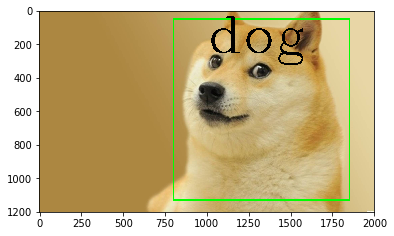

In [63]:
img = cv2.imread('/home/leij/Pictures/doge.jpg',cv2.IMREAD_COLOR)
result = tfnet.return_predict(img)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img.shape
tl = (result[0]['topleft']['x'],result[0]['topleft']['y'])
br = (result[0]['bottomright']['x'],result[0]['bottomright']['y'])
label = result[0]['label']

img = cv2.rectangle(img,tl,br,(0,255,0),7,)
img = cv2.putText(img,label,(tl[0]+200,tl[1]+200),cv2.FONT_HERSHEY_COMPLEX,10,(0,0,0),10)

plt.imshow(img)
plt.show()
